In [1]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import regularizers
from keras.callbacks import TensorBoard
from keras.optimizers import Adam

Using TensorFlow backend.


In [4]:
encoding_dim = 256

input_img = Input(shape = (784,))
dropped = Dropout(0.5, name='dropout')(input_img)
encoded = Dense(encoding_dim, activation = 'relu', name='encoder')(dropped)
decoded = Dense(784, activation='sigmoid', name='decoder')(encoded)

autoencoder = Model(input_img, decoded)

In [5]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
encoder (Dense)              (None, 256)               200960    
_________________________________________________________________
decoder (Dense)              (None, 784)               201488    
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Encoder model
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

# Decoder model
decoder_layer = autoencoder.get_layer('decoder')
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer=Adam(lr = 0.001), loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test,_) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [8]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test,x_test), callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.1991 - val_loss: 0.1202
Epoch 2/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.1280 - val_loss: 0.1002
Epoch 3/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1178 - val_loss: 0.0942
Epoch 4/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1136 - val_loss: 0.0909
Epoch 5/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1110 - val_loss: 0.0902
Epoch 6/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1089 - val_loss: 0.0885
Epoch 7/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1073 - val_loss: 0.0863
Epoch 8/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1058 - val_loss: 0.0862
Epoch 9/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.1044 - val_loss: 0.0

In [9]:
weights,biases = autoencoder.get_layer('encoder').get_weights()
weights = weights.T
weights = weights.T.reshape((len(weights), 28, 28))

pixeled_weights = np.heaviside(weights, 0.5)*255

In [10]:
encoder_imgs = encoder.predict(x_test)
decoder_imgs = decoder.predict(encoder_imgs)

In [11]:
%matplotlib inline

In [21]:
import matplotlib.pyplot as plt
def show_imgs(n, r, c, imgs):
    plt.figure(figsize=(2*c, 2*c))
    for i in range(n):
        ax = plt.subplot(r,c,i+1)
        plt.imshow(imgs[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

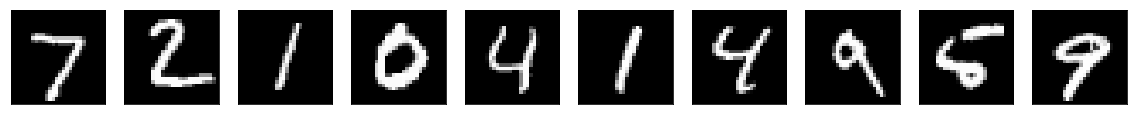

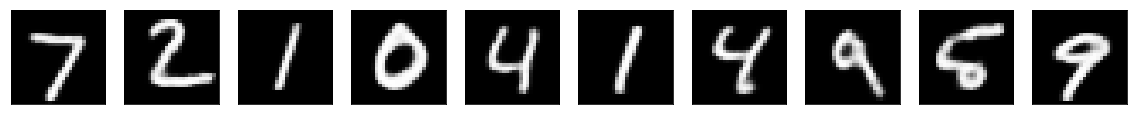

In [22]:
show_imgs(10,1,10,x_test[0:10].reshape((10,28,28)))
show_imgs(10,1,10,decoder_imgs[0:10].reshape((10,28,28)))

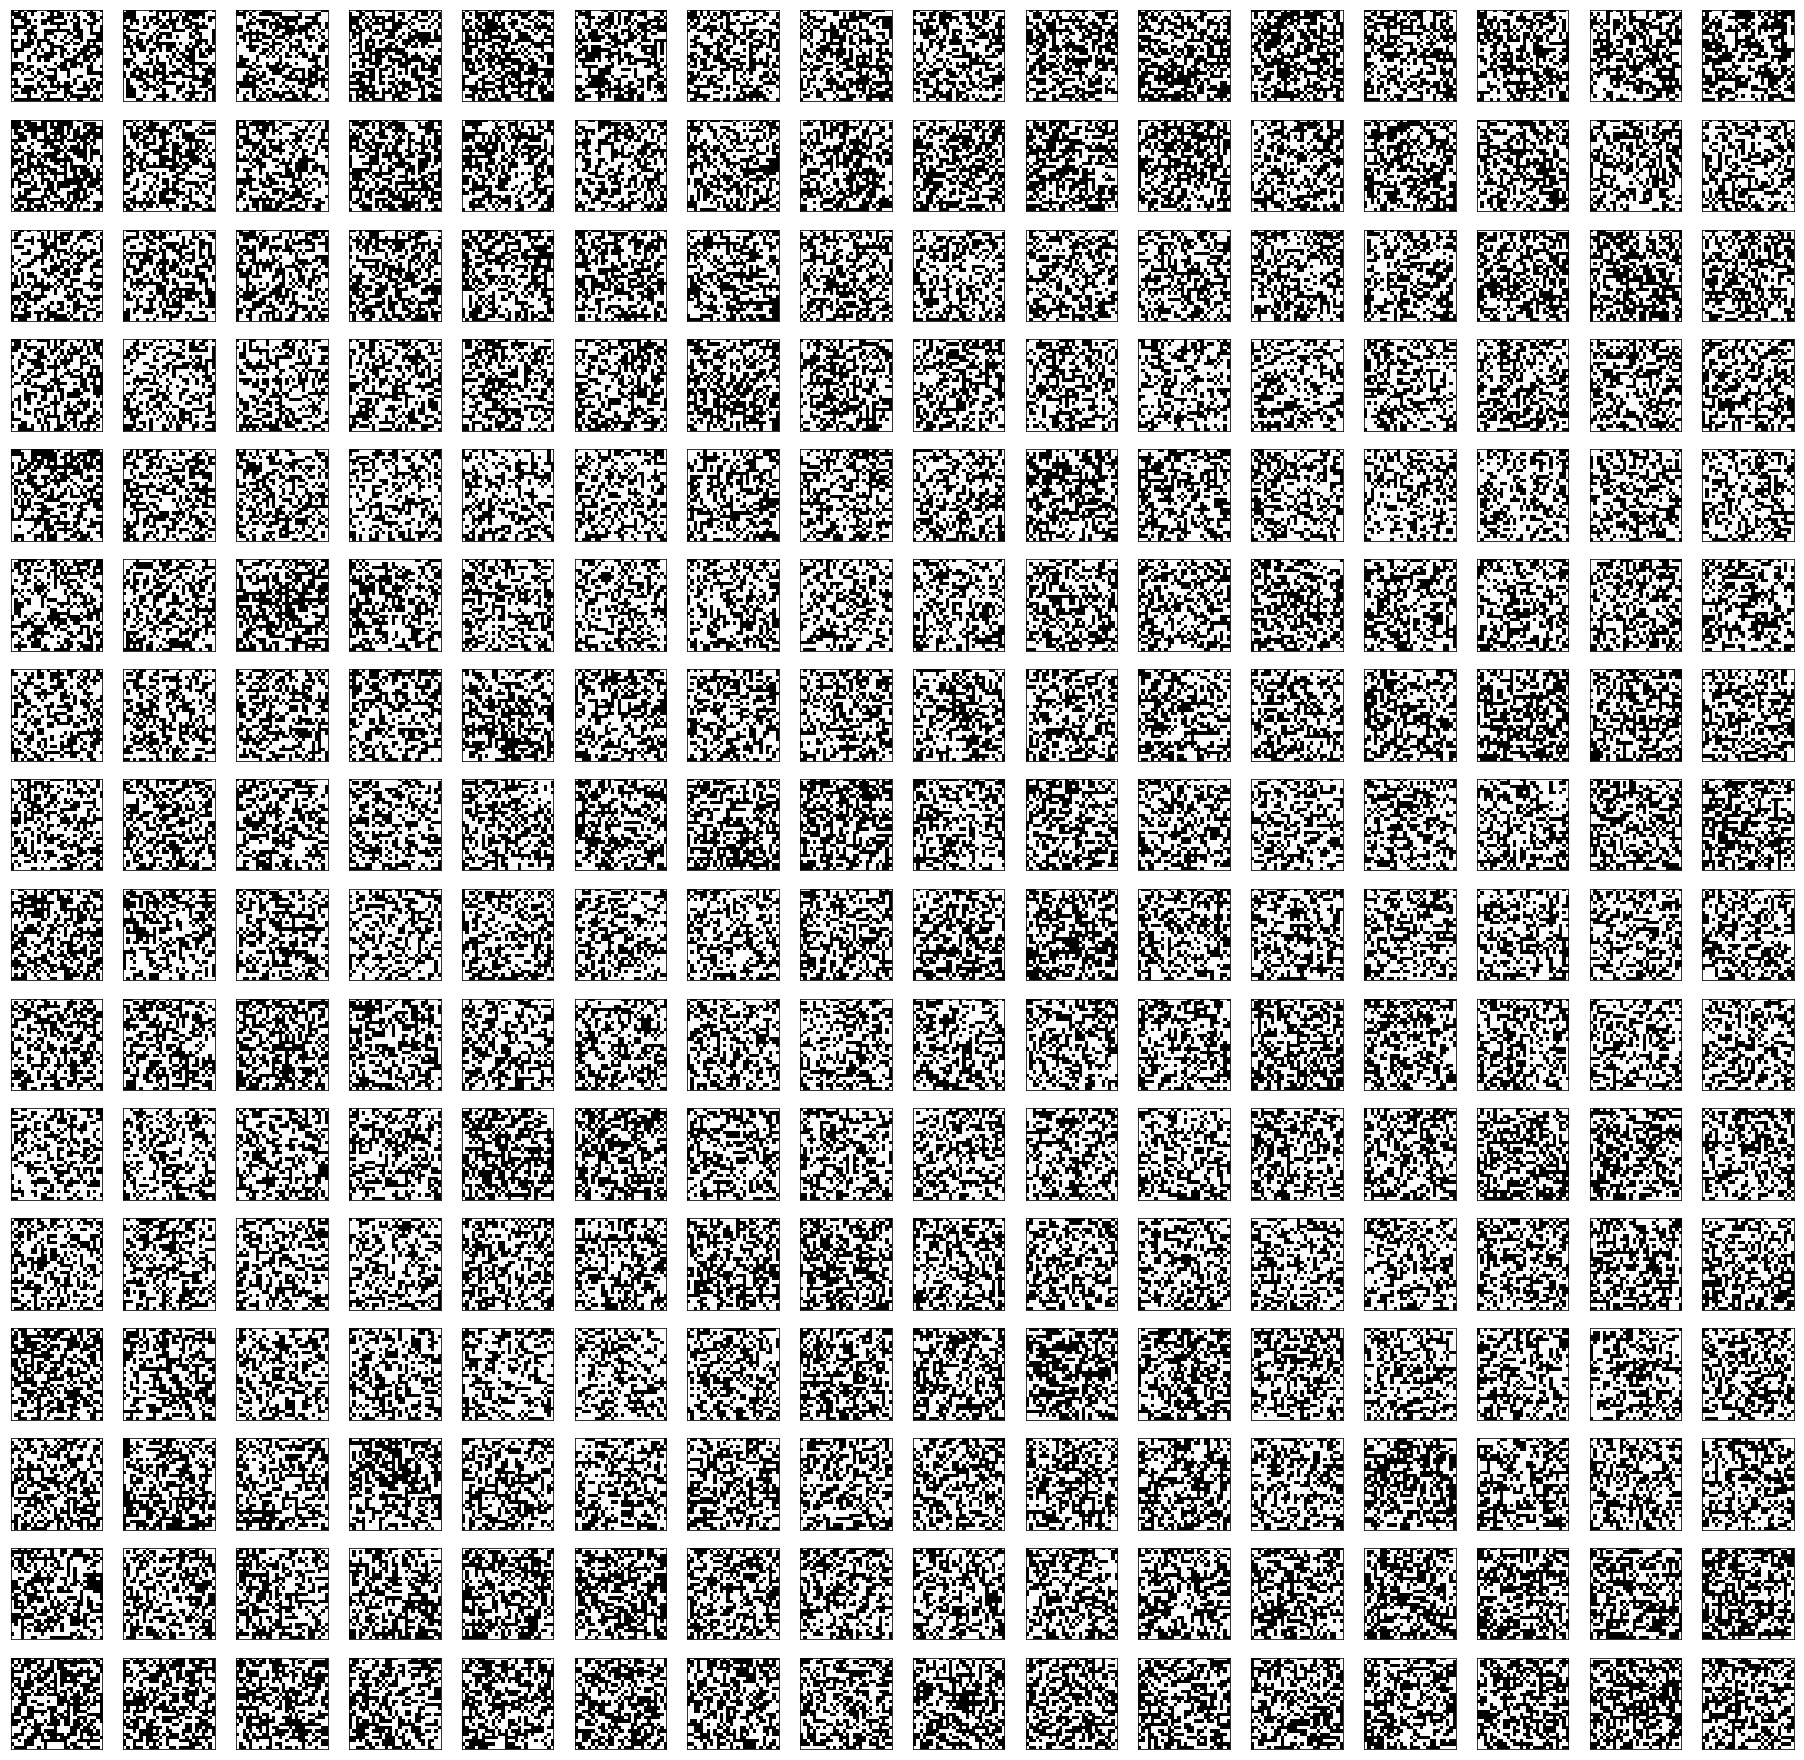

In [23]:
show_imgs(encoding_dim, 16, 16, pixeled_weights)

In [30]:
from numpy import random
test_sample = x_test[100:110]
noised_sample = test_sample + random.normal(loc=0, scale=0.05, size=test_sample.shape)
denoised_sample = autoencoder.predict(noised_sample)

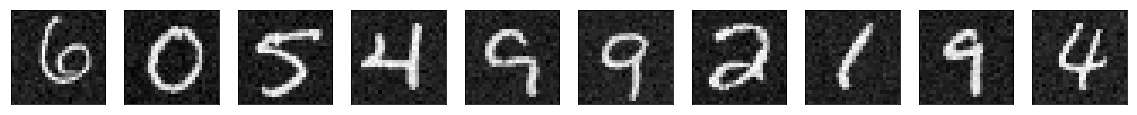

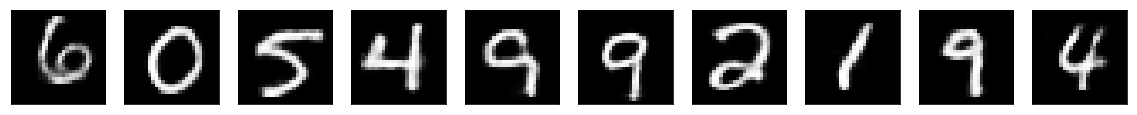

In [31]:
show_imgs(10,1,10,noised_sample.reshape((10,28,28)))
show_imgs(10,1,10,denoised_sample.reshape((10,28,28)))